In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn 

torch.manual_seed(0)
torch.__version__

'1.3.0'

**Step1：**构造训练数据

In [44]:
num_samples = 100       # 每个类别的样本数量
mean_value = 1.7            # 设定正负样本均值
bias = 1                                # 偏置项

# 类别0 数据 shape=(100, 2)
x0 = torch.normal(mean_value * torch.ones(num_samples, 2)) + bias
# 类别0 标签 shape=(100)
y0 = torch.zeros(num_samples)
# 类别1 数据 shape=(100, 2)
x1 = torch.normal(-mean_value * torch.ones(num_samples, 2)) + bias
# 类别1 标签 shape=(100)
y1 = torch.ones(num_samples)

x_train = torch.cat([x0, x1], dim=0)
y_train = torch.cat([y0, y1], dim=0)

print(x_train.shape, y_train.shape)

torch.Size([200, 2]) torch.Size([200])


**Step2：**搭建模型

In [45]:
class LogisticRegression(nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = LogisticRegression()
model

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

**Step3：**选择损失函数

In [46]:
criterion = nn.BCELoss()
criterion

BCELoss()

**Step4：**选择优化器

In [47]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

**Step5：**模型训练

In [48]:
model.linear.weight[0][0].item()

0.6001767516136169

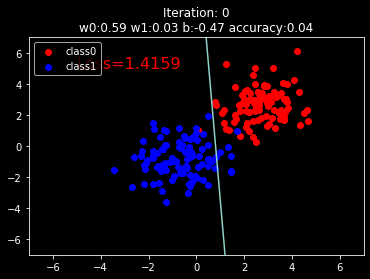

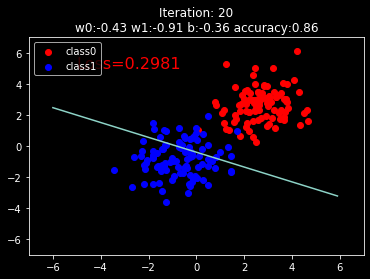

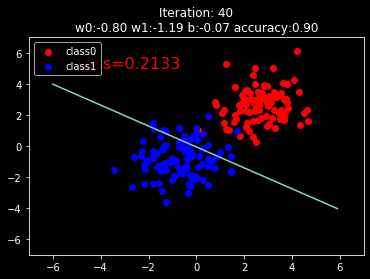

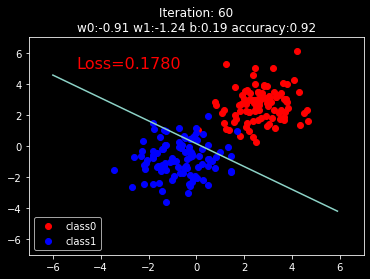

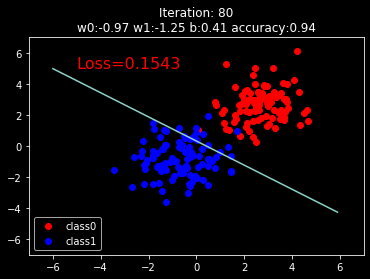

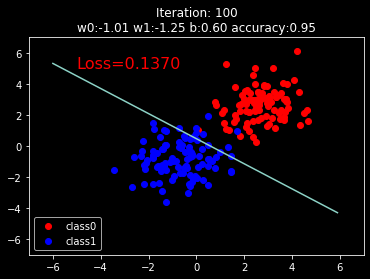

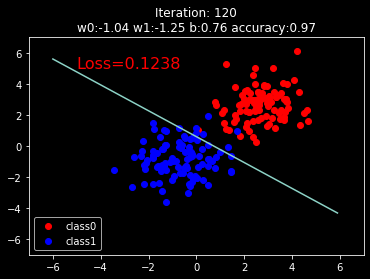

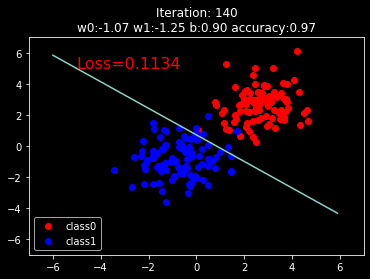

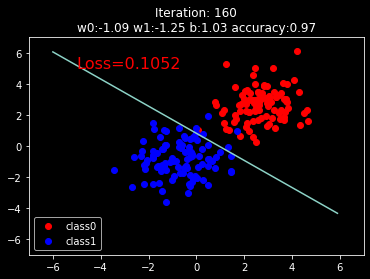

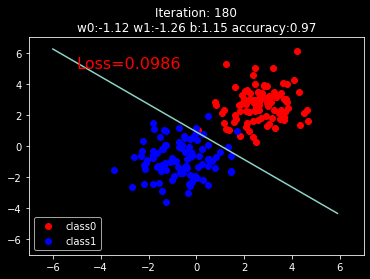

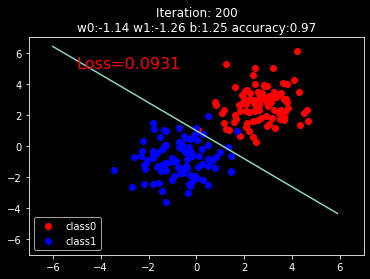

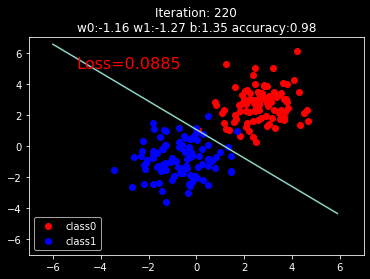

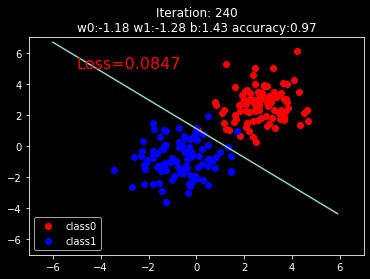

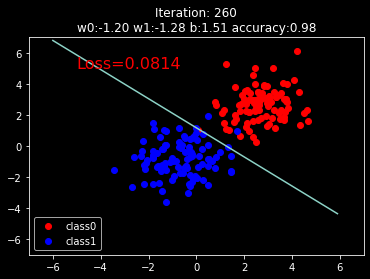

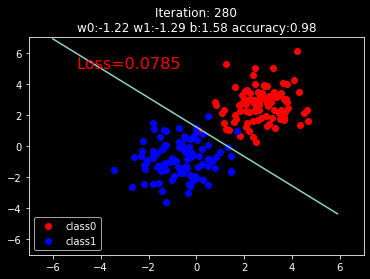

In [49]:
for iter in range(1000):
    # 前向传播
    y_pred = model(x_train).squeeze()
    # 计算损失
    loss = criterion(y_pred, y_train)
    
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iter % 20 == 0:
        # 计算准确率
        mask = y_pred.ge(0.5).float()
        num_correct = (mask == y_train).sum()
        accuracy = num_correct.item() / y_train.size(0)

        # 计算决策边界
        w0, w1 = model.linear.weight[0]
        w0, w1 = w0.item(), w1.item()
        b = model.linear.bias[0].item()
        x_plot = np.arange(-6, 6, 0.1)
        # w0 * x0 + w1 * x1 + b = 0 --> x1 = -(w0 * x0 + b) / w1
        y_plot = -(w0 * x_plot + b) / w1

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class1')
        plt.plot(x_plot, y_plot)

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 16, 'color': 'red'})
        plt.title('Iteration: {}\nw0:{:.2f} w1:{:.2f} b:{:.2f} accuracy:{:.2f}'.format(iter, w0, w1, b, accuracy))

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.legend()
        plt.show()

        if accuracy > 0.98:
            break
    